In [87]:
# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [8]:
import pandas as pd 

In [9]:
df = pd.read_excel('data_Finel.xlsx')

In [10]:
# Display the first few rows of the DataFrame
df.head()

,Field of activity,Process / Machine / Equipement,Risk Related,Risk Causes,Risk Effects,Severity (1-10),Occurrence (1-10),Impact (1-10),Criticality (Severity * Occurrence * Impact)
0,Office administrative / support/ other busines...,Production,Operator error,Insufficient training,Damage to machinery,7,8,9,504
1,Automotive industry,Production,Improper use of extension cords,"Overloading, improper connections","Fire, equipment damage",4,7,10,280
2,Dyeing of textile and clothing,Management,Leadership turnover,High executive turnover,Decreased morale,8,5,1,40
3,Financial services incl. Insurance business,Production,Calibration errors,Poor calibration practices,Inconsistent product quality,5,6,3,90
4,Actitivities of membership organisations,Compliance,Non-compliance with labor laws,Lack of awareness,Legal penalties,7,4,7,196


In [12]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'Field of activity', 'Process / Machine / Equipement', 'Risk Related', 'Risk Causes', 'Risk Effects'
])

# Separate features and target
X = df_encoded.drop(columns=['Criticality (Severity * Occurrence * Impact)'])
y = df_encoded['Criticality (Severity * Occurrence * Impact)']

In [13]:
X.head(5)

,Severity (1-10),Occurrence (1-10),Impact (1-10),Field of activity_Accounting activities,Field of activity_Actitivities of membership organisations,"Field of activity_Active medical devices, active implantable medical devices, implantable medical devices and sterilization of medical devices","Field of activity_Activities of blood banks, transplant organ banks, blood laboratories etc.",Field of activity_Advertising and market research,Field of activity_Aerospace,"Field of activity_Agriculture, Forestry",...,"Risk Effects_Stockouts, overstock",Risk Effects_Sudden machine stops,Risk Effects_System vulnerabilities,"Risk Effects_Theft, vandalism","Risk Effects_Trade restrictions, financial losses","Risk Effects_Undetected faults, safety hazards",Risk Effects_Uneven slicing,Risk Effects_Unexpected failures,Risk Effects_Unfair evaluations,Risk Effects_Widespread contamination
0,7,8,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,7,10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,5,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5,6,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7,4,7,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\MOHAMMED SAID\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 27213.4082 - mae: 109.1098 - val_loss: 716.7451 - val_mae: 18.9069
Epoch 2/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 629.1923 - mae: 17.6252 - val_loss: 336.6684 - val_mae: 13.4292
Epoch 3/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 310.2733 - mae: 12.8978 - val_loss: 256.9527 - val_mae: 11.3515
Epoch 4/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 202.1319 - mae: 10.2348 - val_loss: 159.7007 - val_mae: 8.4097
Epoch 5/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 115.6447 - mae: 7.5170 - val_loss: 115.8271 - val_mae: 7.0106
Epoch 6/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 94.9445 - mae: 6.7190 - val_loss: 102.1580 - val_mae: 6.8110
Epoch 7/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 90.5958 - mae: 6.5373 - val_loss: 87.2742 - val_mae: 6.1090
Epoch 8/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 71.2840 - mae: 5.7353 - val_loss: 84.3262 - val_mae: 6.1228
Epoch 9/50
592/592 

In [107]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5510 - mae: 2.9125
Test Mean Absolute Error: 2.9460527896881104


In [111]:
model


<Sequential name=sequential_4, built=True>

In [110]:
# Make predictions
predictions = model.predict(X_test)

# Compare predictions to actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       Actual   Predicted
28260    10.0   10.796703
15601   224.0  228.678513
7839     54.0   53.931194
4850    126.0  121.859634
4699    135.0  135.812714


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [23]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [25]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest Mean Absolute Error: {mae_rf}")

Random Forest Mean Absolute Error: 3.552097428958186e-05


In [29]:
comparison1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf.flatten()})
print(comparison1.head(200))

       Actual  Predicted
28260    10.0       10.0
15601   224.0      224.0
7839     54.0       54.0
4850    126.0      126.0
4699    135.0      135.0
...       ...        ...
17875   144.0      144.0
24258    10.0       10.0
26425   400.0      400.0
20854    40.0       40.0
4322    240.0      240.0

[200 rows x 2 columns]


In [38]:
from sklearn.svm import SVR

# Initialize and train the model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mae_svm = mean_absolute_error(y_test, y_pred_svm)

In [39]:
mae_svm

11.277309954841472

In [41]:
comparison2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm.flatten()})
comparison2

,Actual,Predicted
28260,10.0,10.772726
15601,224.0,229.560383
7839,54.0,66.970353
4850,126.0,136.507166
4699,135.0,134.544632
...,...,...
21809,3.0,17.234394
19517,90.0,85.854190
28844,360.0,349.377458
3,90.0,87.829489


In [44]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [45]:
mae_xgb


2.3054268

In [46]:
comparison3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb.flatten()})
comparison3

,Actual,Predicted
28260,10.0,10.122319
15601,224.0,223.536850
7839,54.0,53.510136
4850,126.0,130.315918
4699,135.0,138.288666
...,...,...
21809,3.0,1.933705
19517,90.0,90.021584
28844,360.0,355.937714
3,90.0,86.163101


In [47]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Mean Absolute Error: {mae_knn}")

K-Nearest Neighbors Mean Absolute Error: 20.71031951904297


In [48]:
comparison4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn.flatten()})
comparison4

,Actual,Predicted
28260,10.0,22.400000
15601,224.0,215.399994
7839,54.0,97.800003
4850,126.0,171.199997
4699,135.0,186.000000
...,...,...
21809,3.0,5.000000
19517,90.0,94.199997
28844,360.0,398.000000
3,90.0,81.599998


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

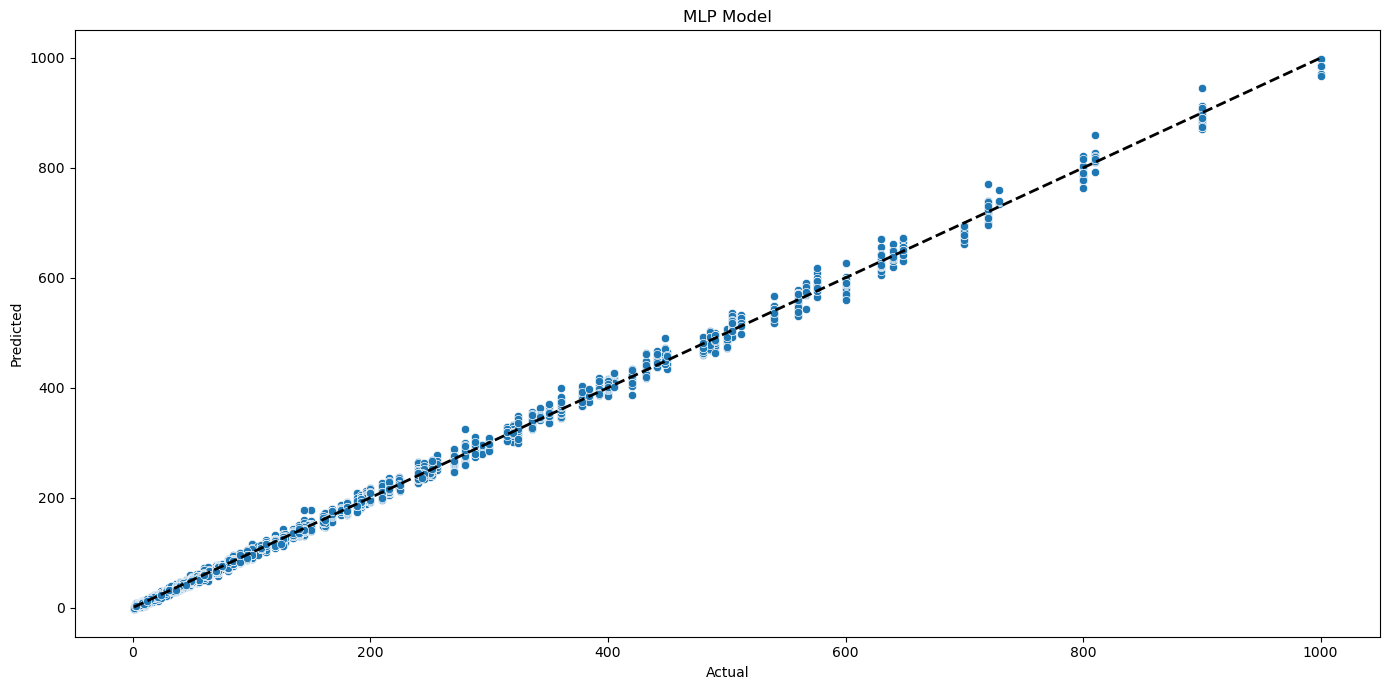

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results
plt.figure(figsize=(14, 7))

# CNN Model
plt.subplot(1, 1, 1)
sns.scatterplot(x=y_test, y=predictions.flatten())
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLP Model')

# Add titles and layout adjustments
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Random Forest')

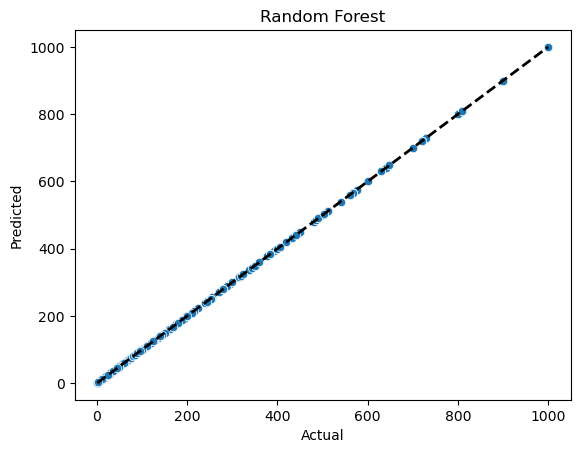

In [59]:
plt.subplot(1, 1, 1)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

Text(0.5, 1.0, 'SVM')

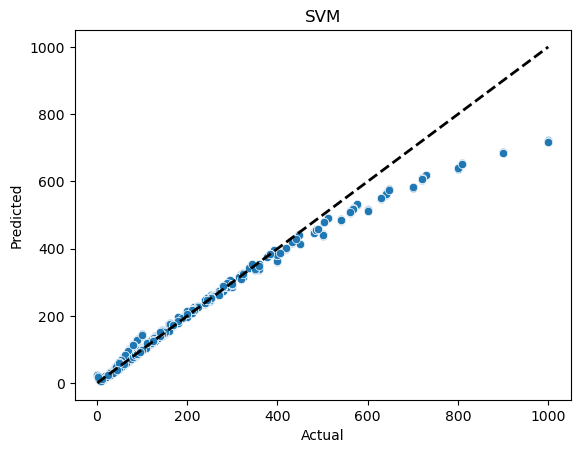

In [60]:
# SVM
plt.subplot(1, 1, 1)
sns.scatterplot(x=y_test, y=y_pred_svm)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM')

Text(0.5, 1.0, 'XGBoost')

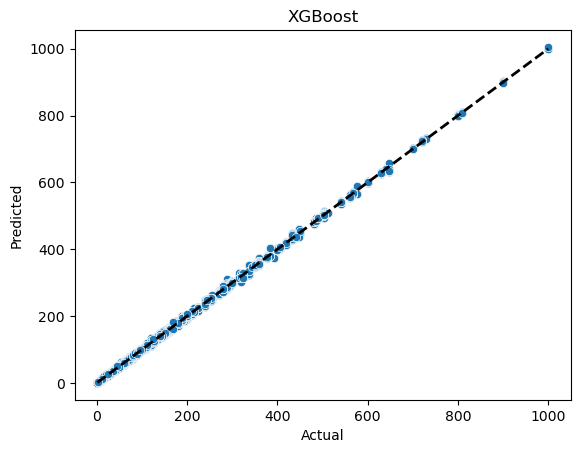

In [61]:
plt.subplot(1, 1, 1)
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost')

Text(0.5, 1.0, 'K-Nearest Neighbors')

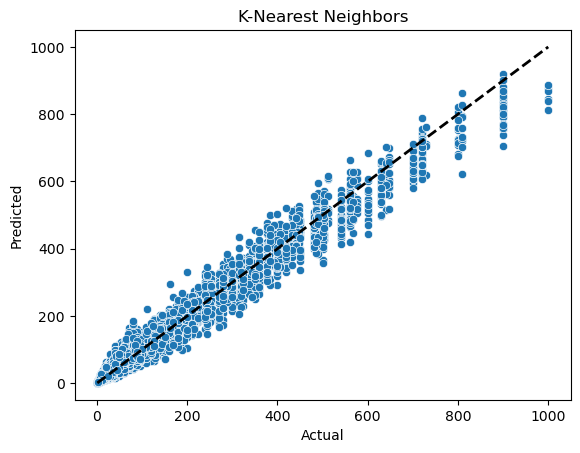

In [62]:
# K-Nearest Neighbors
plt.subplot(1, 1, 1)
sns.scatterplot(x=y_test, y=y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-Nearest Neighbors')

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D
import numpy as np

In [64]:
# Define the model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

C:\Users\MOHAMMED SAID\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
# Reshape the input data to fit the model
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [67]:
# Train the model
history = cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 31346.5645 - val_loss: 4222.9458
Epoch 2/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 6976.2563 - val_loss: 2395.8496
Epoch 3/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 6169.3955 - val_loss: 2898.9209
Epoch 4/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 6024.4492 - val_loss: 2419.2822
Epoch 5/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 5151.5239 - val_loss: 2574.9883
Epoch 6/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 4817.6055 - val_loss: 1548.6660
Epoch 7/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 4431.0459 - val_loss: 1506.1925
Epoch 8/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 4055.0674 - val_loss: 1427.8960
Epoch 9/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 3769.2842 - val_loss: 1260.4799
Epoch 10/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 3378.3843 - val_loss: 1044.2876
Epoch 11/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 31

In [68]:
# Make predictions
y_pred_cnn = cnn_model.predict(X_test_reshaped)


185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [69]:
# Evaluate the model
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
print(f"CNN Model Mean Absolute Error: {mae_cnn}")

CNN Model Mean Absolute Error: 27.58510971069336


In [70]:
comparison5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_cnn.flatten()})
comparison5

,Actual,Predicted
28260,10.0,46.925636
15601,224.0,195.017258
7839,54.0,60.504795
4850,126.0,102.409500
4699,135.0,150.303299
...,...,...
21809,3.0,25.609089
19517,90.0,81.333931
28844,360.0,342.733185
3,90.0,86.902962


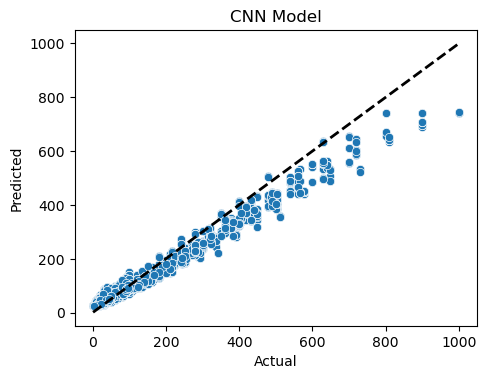

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results
plt.figure(figsize=(14, 7))

# CNN Model
plt.subplot(2, 3, 6)
sns.scatterplot(x=y_test, y=y_pred_cnn.flatten())
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CNN Model')

# Add titles and layout adjustments
plt.tight_layout()
plt.show()

In [118]:

models = ['MLP','CNN', 'Random Forest', 'SVM', 'XGBoost', 'K-Nearest Neighbors','LSTM']
predictions1 = [predictions,y_pred_cnn, y_pred_rf, y_pred_svm, y_pred_xgb, y_pred_knn,y_pred_nn]

In [119]:
for model, y_pred in zip(models, predictions1):
    mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)
    print(f"{model} Model Metrics:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  R^2 Score: {r2}\n")
    print('---------------------------------------------------\n')

MLP Model Metrics:
  Mean Absolute Error (MAE): 2.9460532665252686
  Mean Squared Error (MSE): 20.753826141357422
  Root Mean Squared Error (RMSE): 4.555636882781982
  R^2 Score: 0.9992790161531853

---------------------------------------------------

CNN Model Metrics:
  Mean Absolute Error (MAE): 27.58510971069336
  Mean Squared Error (MSE): 1622.7740478515625
  Root Mean Squared Error (RMSE): 40.283668518066406
  R^2 Score: 0.9436251523889319

---------------------------------------------------

Random Forest Model Metrics:
  Mean Absolute Error (MAE): 3.552097428958186e-05
  Mean Squared Error (MSE): 1.0656292286874961e-06
  Root Mean Squared Error (RMSE): 0.0010322931893059725
  R^2 Score: 0.9999999999629803

---------------------------------------------------

SVM Model Metrics:
  Mean Absolute Error (MAE): 11.277309954841472
  Mean Squared Error (MSE): 735.0629741789459
  Root Mean Squared Error (RMSE): 27.112044817367536
  R^2 Score: 0.9744640594451143

------------------------

In [116]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Define a simple feedforward neural network model
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Output layer for regression
nn_model.compile(optimizer='adam', loss='mse')

# Train the model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and calculate metrics
y_pred_nn = nn_model.predict(X_test).flatten()

Epoch 1/50


C:\Users\MOHAMMED SAID\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 27047.1016 - val_loss: 744.7726
Epoch 2/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 575.9537 - val_loss: 313.6764
Epoch 3/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259.4809 - val_loss: 180.3632
Epoch 4/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 134.6960 - val_loss: 121.7502
Epoch 5/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 96.0846 - val_loss: 132.7068
Epoch 6/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64.9298 - val_loss: 67.6910
Epoch 7/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 65.8890 - val_loss: 104.8114
Epoch 8/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 79.3701 - val_loss: 71.3006
Epoch 9/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 62.4223 - val_loss: 68.0581
Epoch 10/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 51.1088 - val_loss: 75.6514
Epoch 11/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69.0345 - val_loss: 60.3949
Epoch 12/50
592/592 ━━━━━━━━━

In [117]:
comparison6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_nn.flatten()})
comparison6

,Actual,Predicted
28260,10.0,5.798318
15601,224.0,215.081253
7839,54.0,53.573696
4850,126.0,119.440475
4699,135.0,139.654831
...,...,...
21809,3.0,0.584680
19517,90.0,82.653816
28844,360.0,393.344666
3,90.0,86.555984


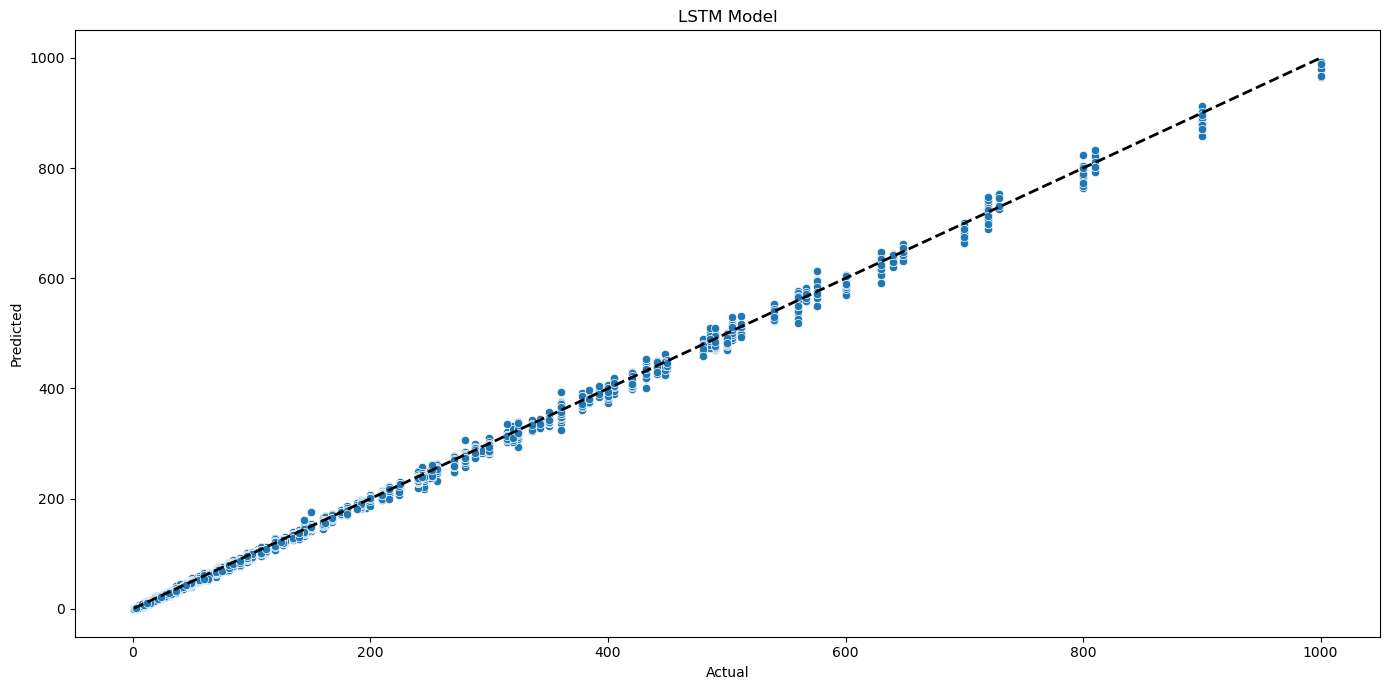

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results
plt.figure(figsize=(14, 7))

# CNN Model
plt.subplot(1,1,1)
sns.scatterplot(x=y_test, y=y_pred_nn.flatten())
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LSTM Model')

# Add titles and layout adjustments
plt.tight_layout()
plt.show()

for metrics :
    MAE = MEAN ABSOLUTE ERROR -> 1/n*SUM(|y-y'|)
    MSE = MEAN SQUARED ERROR -> 1/n*SUM(y-y')^2
    RMSE = ROOT MEAN SQUARED ERROR -> sqrt(MSE)
    RMSLE = ROOT MEAN SQUARED log ERROR -> log(RMSE)
    R2 = r2 score -> 1 - SSres/SStot
        SSres : is the residual sum of squares, which measures the total squared differences between the actual and predicted values
        SStot : is the total sum of squares, which measures the total squared differences between the actual values and the mean of the actual values